In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import cptac
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import umap.umap_ as umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [24]:
os.chdir('/Users/chloelyc/Desktop/QBIO490/qbio_490_chloe/analysis_data')

In [ ]:
rna = pd.read_csv("/Users/chloelyc/Desktop/QBIO490/qbio_490_chloe/week7_rna/brca_rna_count_data.csv", index_col=0)

Perform PCA analysis

In [35]:
rna = rna.transpose()
features = rna.columns
# Separating out the features
x = rna.loc[:, features].values
# Standardizing the features
scaled_rna = StandardScaler().fit_transform(x)

In [23]:
clinical = pd.read_csv("/Users/chloelyc/Desktop/QBIO490/qbio_490_chloe/week7_rna/brca_rna_clinical_data.csv", index_col=0)
y = clinical.loc[:, ["age_category"]].values

In [38]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_rna)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [44]:
principalDf["age_category"] = y

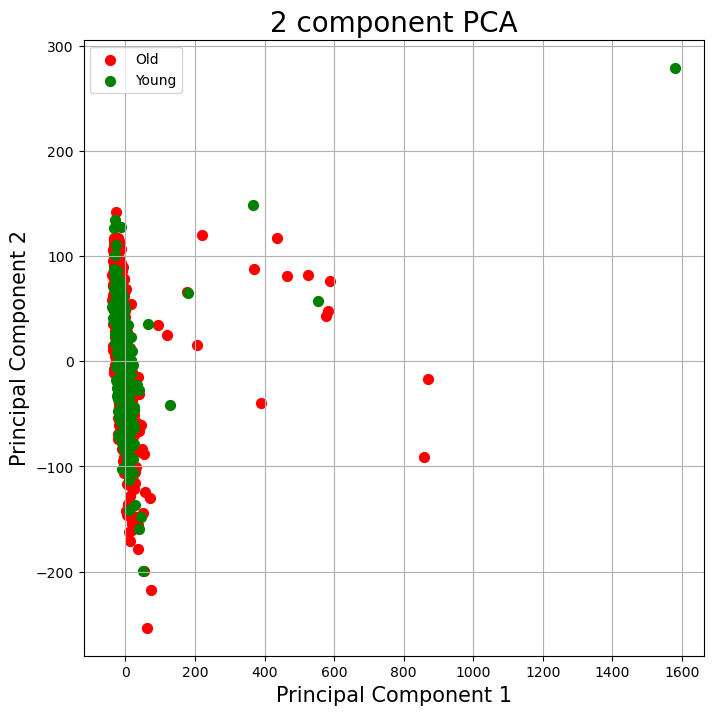

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["Old", "Young"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf["age_category"] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

K-means algorithm

In [2]:
cptac.download(dataset="Brca")
brca = cptac.Brca()
protein_data = brca.get_proteomics()

In [3]:
protein_data = protein_data.dropna(axis=1)

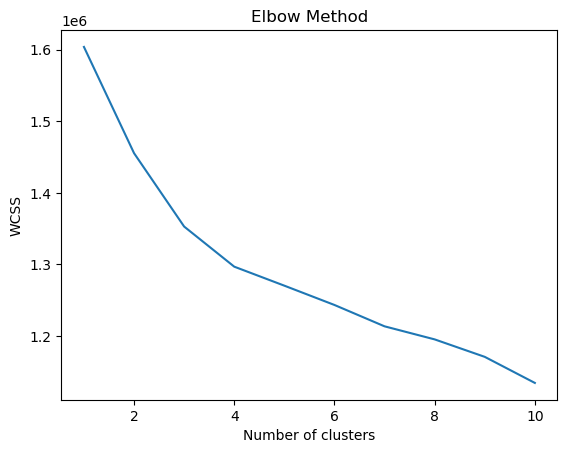

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(protein_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:

kmeans = KMeans(init="k-means++", max_iter=300,
 n_clusters=4, random_state=0, n_init=50).fit(protein_data)
pred_y = kmeans.fit_predict(protein_data)

In [6]:
km = kmeans.cluster_centers_

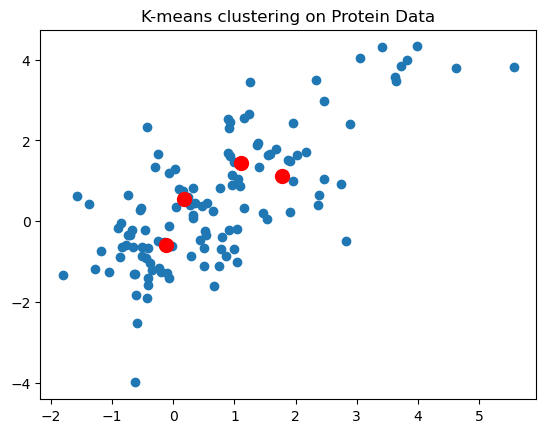

In [23]:

plt.scatter(protein_data.iloc[:,0], protein_data.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.title("K-means clustering on Protein Data")
plt.show()

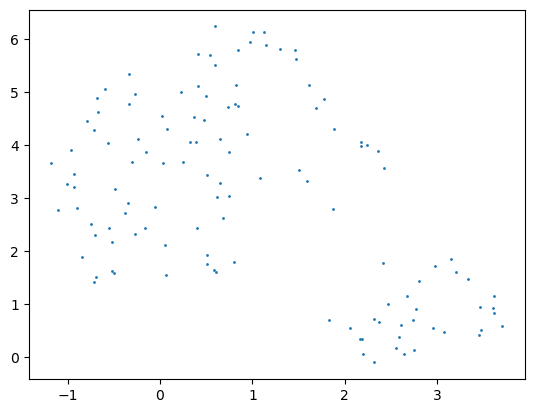

In [17]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(protein_data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=1, cmap='Spectral');
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(protein_data)

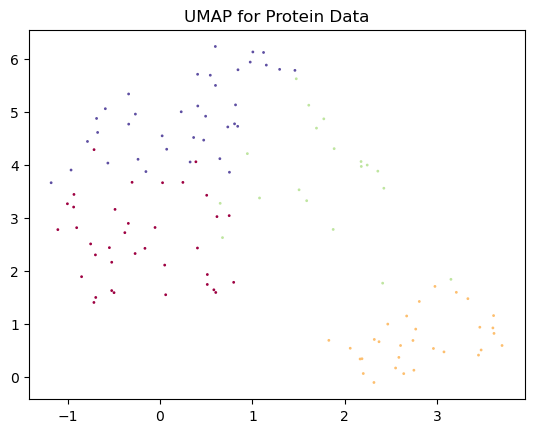

In [28]:
kmeans_labels = cluster.KMeans(n_clusters=4).fit_predict(protein_data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=1, cmap='Spectral');
plt.title("UMAP for Protein Data")
plt.show()